In [2]:
import pandas as pd

df = pd.read_excel("data/news_category_classification/Final.xlsx")
df = df[['target', 'text', 'Llama3-8b', 'Llama3-70b', 'Gemma-7b','gpt-3.5-turbo']] ##Mixtral-8x7b	is reallty bad
df

,target,text,Llama3-8b,Llama3-70b,Gemma-7b,gpt-3.5-turbo
0,politics,nhs waiting time target is cut hospital waitin...,politics,others,business,politics
1,politics,crisis ahead in social sciences a national b...,tech,politics,tech,politics
2,tech,football manager scores big time for the past ...,entertainment,sport,tech,tech
3,politics,uk will stand firm on eu rebate britain s £3b...,politics,politics,business,politics
4,entertainment,greer attacks bully big brother germaine gre...,entertainment,entertainment,entertainment,entertainment
...,...,...,...,...,...,...
495,business,singapore growth at 8.1% in 2004 singapore s e...,business,business,business,business
496,business,mixed reaction to man utd offer shares in manc...,business,business,business,business
497,sport,mourinho plots impressive course chelsea s win...,sport,sport,business,sport
498,tech,supercomputer breaks speed record the us is po...,tech,tech,tech,tech


In [3]:
df['target'].value_counts()

business         117
sport            108
politics         101
entertainment     88
tech              85
others             1
Name: target, dtype: int64

In [4]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

def calculate_metrics(df):
    lista_model = ['Llama3-8b', 'Llama3-70b', 'Gemma-7b','gpt-3.5-turbo']
    target = df['target']
    metrics = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
    confusion_matrices = {}
    for model in lista_model:
        metrics['model'].append(model)
        metrics['accuracy'].append(accuracy_score(target, df[model]))
        metrics['precision'].append(precision_score(target, df[model], average='weighted'))
        metrics['recall'].append(recall_score(target, df[model], average='weighted'))
        metrics['f1_score'].append(f1_score(target, df[model], average='weighted'))
        confusion_matrices[model] = confusion_matrix(target, df[model])
    
    metrics_df = pd.DataFrame(metrics)   
    return metrics_df, confusion_matrices

In [6]:
metrics_df, confusion_matrices = calculate_metrics(df)
metrics_df.sort_values(by='accuracy',ascending=False)

c:\Users\Frenz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,accuracy,precision,recall,f1_score
1,Llama3-70b,0.952,0.958453,0.952,0.954494
3,gpt-3.5-turbo,0.918,0.922779,0.918,0.918910
0,Llama3-8b,0.882,0.888688,0.882,0.880744
2,Gemma-7b,0.832,0.872566,0.832,0.835468


In [5]:
df['target'].value_counts().sort_index(ascending=True).index.to_list()

['business', 'entertainment', 'others', 'politics', 'sport', 'tech']

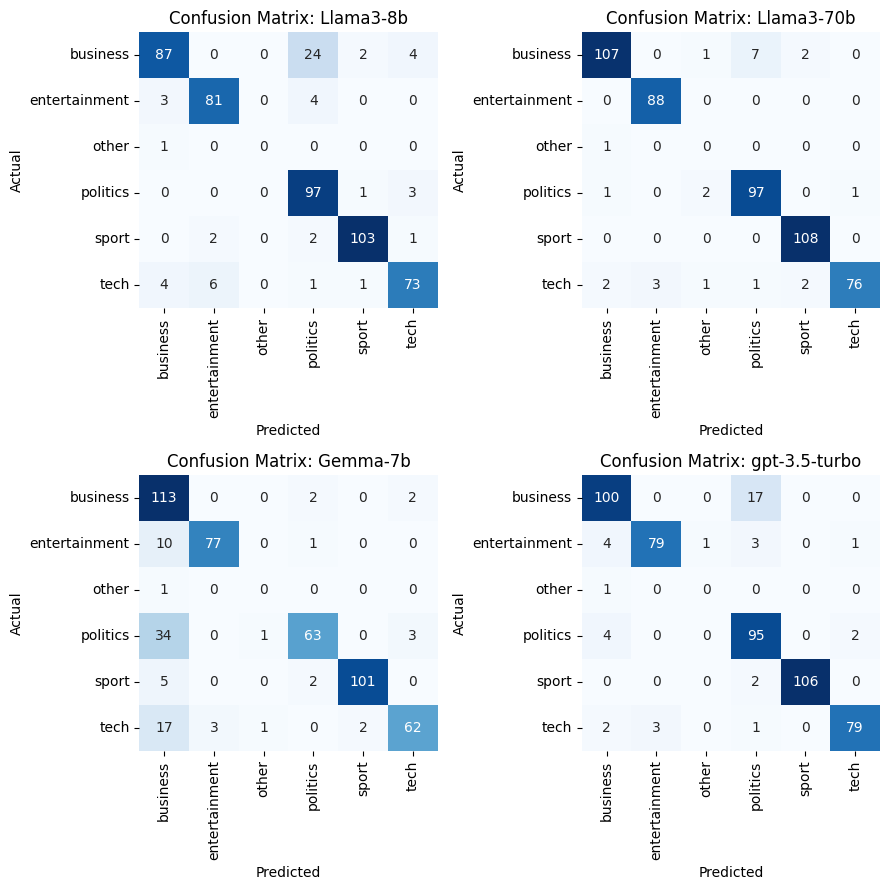

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
lista_model = ['Llama3-8b', 'Llama3-70b', 'Gemma-7b','gpt-3.5-turbo']
labels = ['business', 'entertainment', 'other','politics', 'sport', 'tech']
for i, model in enumerate(lista_model):
    row = i // 2
    col = i % 2
    sns.heatmap(confusion_matrices[model], annot=True, fmt='d', cmap='Blues', ax=axes[row, col],cbar=False,xticklabels=labels,yticklabels=labels)
    axes[row, col].set_title(f'Confusion Matrix: {model}')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

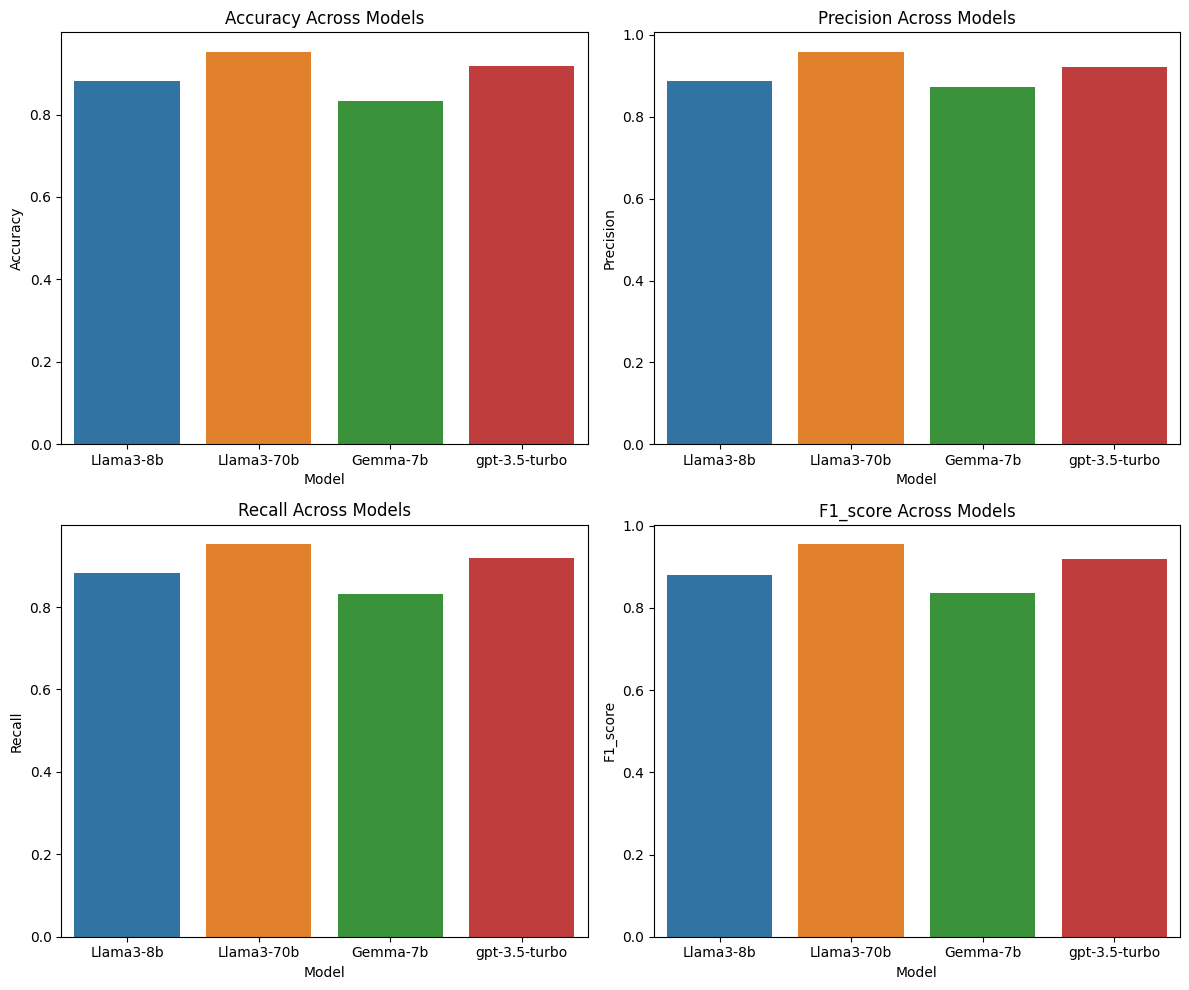

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.barplot(data=metrics_df, x='model', y=metric, ax=axes[row, col],hue='model')
    axes[row, col].set_title(f'{metric.capitalize()} Across Models')
    axes[row, col].set_ylabel(metric.capitalize())
    axes[row, col].set_xlabel('Model')

plt.tight_layout()
plt.show()